
## Infinite Series Notebook

In [1]:
from wav_table import *
from freq_table import *

In [2]:
 #first lets call the digits of pi
digits_of_pi(5000)

1157 digits of pi:
 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927

In [3]:

pi

3.14

In [4]:
 pi_hz_octave

{-3: 3.14,
 -2: 6.28,
 -1: 12.56,
 0: 25.12,
 1: 50.24,
 2: 100.48,
 3: 200.96,
 4: 401.92,
 5: 803.84,
 6: 1607.68,
 7: 3215.36,
 8: 6430.72}

In [5]:
pi_hz = Hz(3.14, length=range(0,900)

In [71]:
pi_overtone_series = pi_hz.make_overtone_series()
pi_overtone_series[1:17]

[3.14,
 6.28,
 9.42,
 12.56,
 15.700000000000001,
 18.84,
 21.98,
 25.12,
 28.26,
 31.400000000000002,
 34.54,
 37.68,
 40.82,
 43.96,
 47.1,
 50.24]

In [7]:
closest_pitchname_list = []
for i in pi_overtone_series[1:]:
    closest_pitchname_list.append(closest_pitch(i))
closest_pitchname_list[:16]

['G-3',
 'G-2',
 'D-1',
 'G-1',
 'B-1',
 'D0',
 'F0',
 'G0',
 'A0',
 'B0',
 'C#1',
 'D1',
 'E1',
 'F1',
 'F#1',
 'G1']

It appears the closet overtone series to the series generated from pi as the starting frequency is G natural overtone series.

This would mean that pi expressed as frequencies is closet to G major. But lets look at how far away it is

In [8]:
pitch_to_frequency.get('G')

{0: 24.5,
 1: 49.0,
 2: 98.0,
 3: 196.0,
 4: 392.0,
 5: 783.99,
 6: 1567.98,
 7: 3135.95,
 8: 6271.93}

In [9]:
pi_hz_octave

{-3: 3.14,
 -2: 6.28,
 -1: 12.56,
 0: 25.12,
 1: 50.24,
 2: 100.48,
 3: 200.96,
 4: 401.92,
 5: 803.84,
 6: 1607.68,
 7: 3215.36,
 8: 6430.72}

In [10]:
octave_0_diff = pi_hz_octave[0] - pitch_to_frequency.get('G')[0]
print('In ocatve 0 pi is ' + str(octave_0_diff) + ' cents sharp of G')

In ocatve 0 pi is 0.620000000000001 cents sharp of G


In [11]:
octave_8_diff = pi_hz_octave[8] - pitch_to_frequency.get('G')[8]
print('In ocatve 8 pi is ' + str(octave_8_diff) + ' cents sharp of G')

In ocatve 8 pi is 158.78999999999996 cents sharp of G


## Turning PI into Raw Signal

In [12]:
# using on digit from pi_overtone_series to generate a signal
pi_raw = Raw_Signal(sampling_rate=pi_overtone_series[80],
                    freq=pi_overtone_series[1], 
                    samples=pi_overtone_series[40],
                    generate='on', 
                    graph='on')


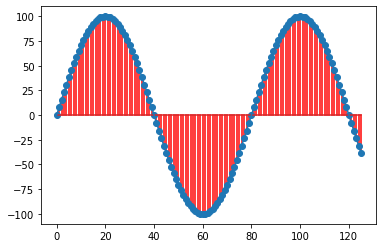

In [13]:
pi_raw.make_sine_wav()

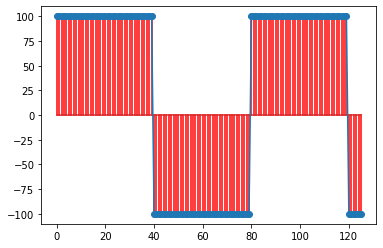

In [14]:
pi_raw.make_square_wav()

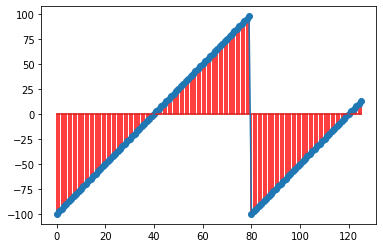

In [15]:
pi_raw.make_sawtooth_wav()

Now lets turn the pi into an wav signal and then choose 16 harmonics from a octave that our ears can hear. pi, it self will not be audible.

In [16]:
closest_pitchname_list[:16]

['G-3',
 'G-2',
 'D-1',
 'G-1',
 'B-1',
 'D0',
 'F0',
 'G0',
 'A0',
 'B0',
 'C#1',
 'D1',
 'E1',
 'F1',
 'F#1',
 'G1']

In [17]:
pi_overtone_series[1:17]

[3.14,
 6.28,
 9.42,
 12.56,
 15.700000000000001,
 18.84,
 21.98,
 25.12,
 28.26,
 31.400000000000002,
 34.54,
 37.68,
 40.82,
 43.96,
 47.1,
 50.24]

In [18]:
pi_tones = pi_hz.transpose_hz(wav_list=pi_overtone_series[1:18],
                           transposition_amnt=2,
                           direction='up octaves')
pi_tones

[9.8596,
 39.4384,
 88.7364,
 157.7536,
 246.49000000000004,
 354.9456,
 483.1204,
 631.0144,
 798.6276000000001,
 985.9600000000002,
 1193.0116,
 1419.7824,
 1666.2724,
 1932.4816,
 2218.4100000000003,
 2524.0576,
 2849.4244000000003]

In [19]:
pi_wav_objs = {}
for i,hz in enumerate(pi_tones):
    pi_wav_objs[i] = Wav_Signal(carrier_hz=hz)

In [20]:
# now we have 16 wav_signal objects using frequences from pi's harmoninc series
pi_wav_objs

{0: <wav_table.Wav_Signal at 0x1c2573b9b0>,
 1: <wav_table.Wav_Signal at 0x1c25744cc0>,
 2: <wav_table.Wav_Signal at 0x1c2573b3c8>,
 3: <wav_table.Wav_Signal at 0x1c2573b518>,
 4: <wav_table.Wav_Signal at 0x1c2573bef0>,
 5: <wav_table.Wav_Signal at 0x1c2573b668>,
 6: <wav_table.Wav_Signal at 0x1c2573b710>,
 7: <wav_table.Wav_Signal at 0x1c2573b0f0>,
 8: <wav_table.Wav_Signal at 0x1c2573bc50>,
 9: <wav_table.Wav_Signal at 0x1c2573b7b8>,
 10: <wav_table.Wav_Signal at 0x1c2563ffd0>,
 11: <wav_table.Wav_Signal at 0x1c2563f898>,
 12: <wav_table.Wav_Signal at 0x1c2563f198>,
 13: <wav_table.Wav_Signal at 0x1c2563f358>,
 14: <wav_table.Wav_Signal at 0x1c2563fa20>,
 15: <wav_table.Wav_Signal at 0x1c2563f400>,
 16: <wav_table.Wav_Signal at 0x1c2563f6a0>}

In [21]:
# but lets make sure to add pi in there as well
pi_wav = Wav_Signal(carrier_hz=pi)

In [22]:
# while it will be inaudiable, here is a true pi audio sine wav
pi_wav.make_simple_wav('sine')

In [23]:
# lets make each type of wav for the pi frequencey
pi_wav.make_simple_wav('square')
pi_wav.make_simple_wav('square_duty')
pi_wav.make_simple_wav('sawtooth')
pi_wav.make_mod_wav('sine')
pi_wav.make_mod_wav('square')
pi_wav.make_mod_wav('square_duty')
pi_wav.make_mod_wav('sawtooth')

## Lets look at the Pi_Wav_Objs dictionary of pi harmonics

In [69]:
# calling a single object from the dictionary of pi objects, we can see all the attributes of this object
inspect(pi_wav_objs.get(0))

obj.__class__ = <class 'wav_table.Wav_Signal'>
obj.__delattr__ = <method-wrapper '__delattr__' of Wav_Signal object at 0x1c2573b9b0>
obj.__dict__ = {'sps': 44100, 'carrier_hz': 9.8596, 'duration_s': 10.0, 'duty': 0.8, 't_samples': array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 4.40997e+05,
       4.40998e+05, 4.40999e+05]), 'wav': array([0.00000000e+00, 1.40475496e-03, 2.80950993e-03, ...,
       6.19492724e+02, 6.19494129e+02, 6.19495534e+02]), 'sin_carrier': array([ 0.        ,  0.00042143,  0.00084285, ..., -0.169138  ,
       -0.1694859 , -0.16983346]), 'sq_carrier': array([ 1.,  1.,  1., ..., -1., -1., -1.]), 'sq_duty_carrier': array([0.3, 0.3, 0.3, ..., 0.3, 0.3, 0.3]), 'saw_carrier': array([-0.3       , -0.29986586, -0.29973171, ...,  0.05719757,
        0.05733171,  0.05746586])}
obj.__dir__ = <built-in method __dir__ of Wav_Signal object at 0x1c2573b9b0>
obj.__doc__ = ' \n    Wav_Signal is a  class that instantiates signal objects that generate audio waves.\n    It also ca

In [70]:
# inspecting the pi_hz object 
inspect(pi_hz)

obj.__class__ = <class 'wav_table.Hz'>
obj.__delattr__ = <method-wrapper '__delattr__' of Hz object at 0x1c24ee4c18>
obj.__dict__ = {'hz': 3.14, 'length': range(0, 900)}
obj.__dir__ = <built-in method __dir__ of Hz object at 0x1c24ee4c18>
obj.__doc__ = None
obj.__eq__ = <method-wrapper '__eq__' of Hz object at 0x1c24ee4c18>
obj.__format__ = <built-in method __format__ of Hz object at 0x1c24ee4c18>
obj.__ge__ = <method-wrapper '__ge__' of Hz object at 0x1c24ee4c18>
obj.__getattribute__ = <method-wrapper '__getattribute__' of Hz object at 0x1c24ee4c18>
obj.__gt__ = <method-wrapper '__gt__' of Hz object at 0x1c24ee4c18>
obj.__hash__ = <method-wrapper '__hash__' of Hz object at 0x1c24ee4c18>
obj.__init__ = <bound method Hz.__init__ of <wav_table.Hz object at 0x1c24ee4c18>>
obj.__init_subclass__ = <built-in method __init_subclass__ of type object at 0x7ffde2f28a18>
obj.__le__ = <method-wrapper '__le__' of Hz object at 0x1c24ee4c18>
obj.__lt__ = <method-wrapper '__lt__' of Hz object at 0x1c2

In [25]:
# take every frequency in the in the pi object dictionary and make 8 different types of wav files 
# each wave file can be considered a different timbre
for k,v in pi_wav_objs.items():
    v.make_simple_wav('sine')
    v.make_simple_wav('sqaure')
    v.make_simple_wav('square_duty')
    v.make_simple_wav('sawtooth')
    v.make_mod_wav('sine')
    v.make_mod_wav('square')
    v.make_mod_wav('square_duty')
    v.make_mod_wav('sawtooth')

In [26]:
# make a single G3 object
G_maj = Wav_Signal(carrier_hz=pitch_to_frequency.get('G')[3])

In [27]:
# generating a simple sine wav
G_maj.make_simple_wav('sine')

In [63]:
import glob
# in order to start creating with the signals, we need to localize them into a callable list.
# here is a list of all the 'simple' signals
pi_wavs = glob.glob('wav_files/simple*wav')

In [64]:
# here is a list of all the modualated signals
pi_wavs_ = glob.glob('wav_files/mod*.wav')

In [65]:
# putting both lists together so that all files are callable
pi_wavs.extend(pi_wavs_)

In [66]:
# an even number is necesary for the next steps
len(pi_wavs)

128

## Stack and Connect Signals

### Vertical

In [67]:
# take list of files, outputs and titled layered audio wav files
stack_quad = stack_inital(pi_wavs, 'stack_pair', 'stack_quad')
stack_layers('wav_files/'+stack_quad+'*.wav', 'stack_oct')
stack_layers('wav_files/stack_oct*.wav', 'stack_16')
stack_layers('wav_files/stack_16*.wav', 'stack_32')
stack_layers('wav_files/stack_32*.wav', 'stack_64')
s_list = glob.glob('wav_files/stack_64*.wav')
stack_wav(s_list, 'Final_PI_stack.wav')

All callable pairs are titled with: stack_pair
All coupled files are now stacked
All coupled files are now stacked
All coupled files are now stacked
All coupled files are now stacked
All coupled files are now stacked


### Horizontal

In [61]:
# take list of files, outputs and titled concatenated audio wav files
conn_quad = concat_inital(pi_wavs, 'conn_pair', 'conn_quad')
concat_layers('wav_files/'+conn_quad+'*.wav', 'conn_oct')
concat_layers('wav_files/conn_oct*.wav', 'conn_16')
concat_layers('wav_files/conn_16*.wav', 'conn_32')
concat_layers('wav_files/conn_32*.wav', 'conn_64')
c_list = glob.glob('wav_files/conn_64*.wav')
concat_wav(c_list, 'Final_PI_conn.wav')

All callable pairs are titled with: conn_pair
All coupled files are now connected
All coupled files are now connected
All coupled files are now connected
All coupled files are now connected
All coupled files are now connected
